In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')

train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Calic, Mr. Petar",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 数值类型字段：Age、SibSp、Parch、Fare
- 类别类型字段：Pclass、Ticket、Cabin、Embarked
- 字符串类型字段：Name

In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
train.isnull().sum(0)
# Age 数值类型字段如何填充缺失值？
# Cabin、Embarked 类别类型字段如何填充缺失值？

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# 每个字段与标签的分布关系
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Pclass'>

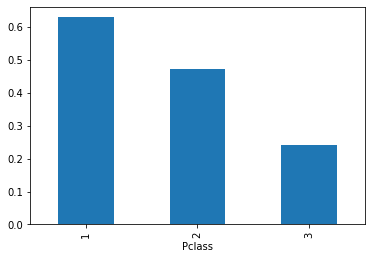

In [16]:
train.groupby('Pclass')['Survived'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

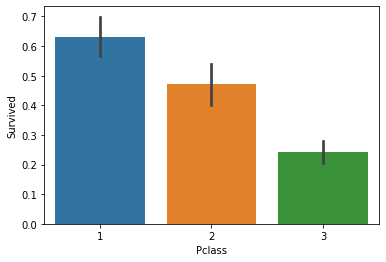

In [17]:
sns.barplot(x='Pclass', y='Survived', data=train)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

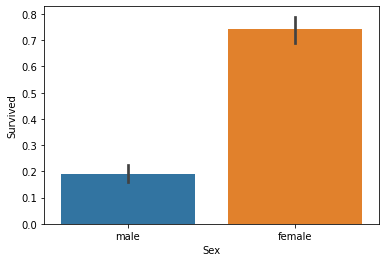

In [18]:
sns.barplot(x='Sex', y='Survived', data=train)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

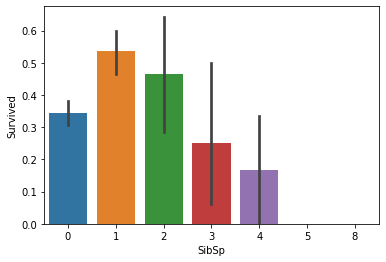

In [19]:
sns.barplot(x='SibSp', y='Survived', data=train)

In [21]:
# 填充缺失值
# -0.5 是为了后面进行分箱时，分到 -1 到 0 这个分段中
train['Age'] = train['Age'].fillna(-0.5)
test['Age'] = test['Age'].fillna(-0.5)

train['AgeGroup'] = pd.cut(train['Age'], [-1, 0, 5, 12, 18, 24, 60, np.inf],
    labels=['Unkonw', 'Baby', 'Child', 'Teenager', 'Student', 'Adult', 'Senior'])

test['AgeGroup'] = pd.cut(test['Age'], [-1, 0, 5, 12, 18, 24, 60, np.inf],
    labels=['Unkonw', 'Baby', 'Child', 'Teenager', 'Student', 'Adult', 'Senior'])

<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

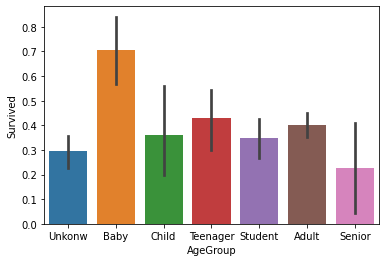

In [23]:
sns.barplot(x='AgeGroup', y='Survived', data=train)

In [24]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.')
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.')

<AxesSubplot:xlabel='Title', ylabel='Survived'>

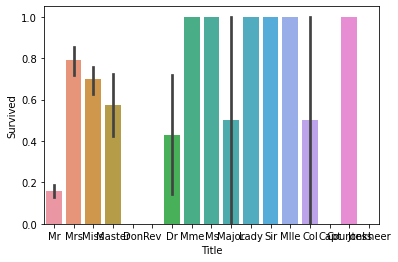

In [26]:
sns.barplot(x='Title', y='Survived', data=train)

In [27]:
train['Ticket'].value_counts()

CA. 2343             7
347082               7
1601                 7
3101295              6
CA 2144              6
                    ..
348123               1
SOTON/O.Q. 392078    1
3101277              1
27267                1
230434               1
Name: Ticket, Length: 681, dtype: int64

In [29]:
train = train.drop(['Name', 'Ticket'], axis=1)
test = test.drop(['Name', 'Ticket'], axis=1)

In [32]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
lbl.fit(train['Sex'])
train['Sex'] = lbl.transform(train['Sex'])
test['Sex'] = lbl.transform(test['Sex'])

In [35]:
for col in ['Cabin', 'Embarked', 'AgeGroup', 'Title']:
    lbl = LabelEncoder()
    train[col] = train[col].astype(object)
    test[col] = test[col].astype(object)

    train[col] = train[col].fillna('-1')
    test[col] = test[col].fillna('-1')

    lbl.fit(list(train[col]) + list(test[col])) # 取值空间

    train[col] = lbl.transform(train[col])
    test[col] = lbl.transform(test[col])

In [38]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,Title
0,1,0,3,1,22.0,1,0,7.2500,0,3,4,13
1,2,1,1,0,38.0,1,0,71.2833,107,1,0,14
2,3,1,3,0,26.0,0,0,7.9250,0,3,0,10
3,4,1,1,0,35.0,1,0,53.1000,71,3,0,14
4,5,0,3,1,35.0,0,0,8.0500,0,3,0,13


In [39]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train.drop(['PassengerId', 'Survived'], axis=1), train['Survived'])

In [47]:
x_train.shape, x_val.shape

((668, 10), (223, 10))

In [53]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x_train, y_train)
clf.score(x_val, y_val)

0.7488789237668162

In [54]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train, y_train)
clf.score(x_val, y_val)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7802690582959642

In [55]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_val, y_val)

0.8071748878923767

In [58]:
test = test.fillna(-1)

In [61]:
pre = clf.predict(test.drop(['PassengerId'], axis=1))



In [63]:
sample = test[['PassengerId']]

In [69]:
sample['Survived'] = pre

<ipython-input-69-8aa9d540a90a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Survived'] = pre


In [70]:
sample

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [73]:
sample.to_csv('./titanic/res.csv', index=None)